In [5]:
import sys
sys.path.append('../')

In [6]:
# 策略： 银行股票，市值前十，市净率低于0.6买入。首次买40%仓位，每跌10%补仓20%
import data.Stock as st
import pandas as pd
import  numpy as np
import strategy.base as strat
import matplotlib.pyplot as plt

auth success 


In [23]:
def ba_strategy(data, pb_low=0.8, pb_high=1.3):
    '''

    :param data: df必须包含收盘价
    :param short_window:
    :param long_window:
    :return:
    '''

    # 是否存在市净率、收盘价
    columns = data.columns.values
    if  'close' not in data.columns:
        print('feature \'close\' should in ')
        return
    if  'pb_ratio' not in columns:
        print('feature \'pb_ratio\' should in ')
        return

    # 计算技术指标
    data = pd.DataFrame(data)

    # 生成信号： pb<0.6买入  ，大于0.1,卖出
    data['buy_signal'] = np.where(data['pb_ratio'] < pb_low, 1, 0)
    data['sell_signal'] = np.where(data['pb_ratio'] > pb_high, -1, 0)

    # 过滤信号
    data = strat.compose_signal(data)

    # 删除多余
    data.drop(labels=['buy_signal', 'sell_signal'], axis=1)
    
    # 如果买卖总次数大于2，计算收益
    if len(data[data['signal'] != 0 ])>2:
        # 计算单次收益
        data= strat.calculate_prof_pct(data) 
        # 计算累计收益
        data = strat.calculate_cum_prof(data)
        
    else :
        data = None

    return data

In [36]:
# 目标股票代码
stocks = st.get_stock_list_all()
stock_list = list(stocks[stocks['display_name'].str.contains('银行')].index)
# 容器
all_dfprice = {}
# 目标收盘价以及PE指标
for code in stock_list:
    print(code)
    dfprice = st.get_single_price(code, 'daily', '2015-01-01', '2021-04-05')
    for date in dfprice.index:
        cc = st.get_single_valuation(code, date, statDate=None)
        if len(cc)>0:
            dfprice.loc[date, 'pb_ratio'] = cc.pb_ratio[0]
            dfprice.loc[date, 'market_cap'] = cc.market_cap[0]
    dfprice.to_csv(code+'.csv')
    all_dfprice[code] = dfprice

000001.XSHE
002142.XSHE
002807.XSHE
002936.XSHE
002948.XSHE
002966.XSHE
600000.XSHG
600015.XSHG
600016.XSHG
600036.XSHG
600908.XSHG
600919.XSHG
600926.XSHG
600928.XSHG
601009.XSHG
601128.XSHG
601166.XSHG
601169.XSHG
601187.XSHG
601229.XSHG
601288.XSHG
601328.XSHG
601398.XSHG
601577.XSHG
601658.XSHG
601818.XSHG
601838.XSHG
601860.XSHG
601916.XSHG
601939.XSHG
601963.XSHG
601988.XSHG
601997.XSHG
601998.XSHG
603323.XSHG


In [35]:
if len(st.get_single_valuation(code, date, statDate=None))>0:
    print(True)

In [26]:
all_dfprice

{'000001.XSHE':              open  close   high    low       volume         money  pb_ratio  \
 2015-01-05  10.24  10.26  10.43   9.99  446489383.0  4.565388e+09    1.4442   
 2015-01-06  10.15  10.11  10.50   9.96  338159640.0  3.453446e+09    1.4225   
 2015-01-07   9.97   9.92  10.14   9.80  265374121.0  2.634796e+09    1.3955   
 2015-01-08   9.93   9.58   9.97   9.55  219732012.0  2.128003e+09    1.3486   
 2015-01-09   9.55   9.66  10.17   9.42  391555169.0  3.835378e+09    1.3594   
 2015-01-12   9.53   9.46   9.64   9.29  242455266.0  2.293105e+09    1.3315   
 2015-01-13   9.39   9.40   9.55   9.36  127507088.0  1.204987e+09    1.3234   
 2015-01-14   9.47   9.49   9.74   9.42  197147991.0  1.889297e+09    1.3351   
 2015-01-15   9.51   9.83   9.83   9.42  193892038.0  1.868796e+09    1.3838   
 2015-01-16   9.87   9.85  10.01   9.73  242854160.0  2.403346e+09    1.3856   
 2015-01-19   8.98   8.86   9.33   8.86  333586514.0  3.016203e+09    1.2467   
 2015-01-20   8.86   8.86

In [108]:
stocks

,display_name,name,start_date,end_date,type
000001.XSHE,平安银行,PAYH,1991-04-03,2200-01-01,stock
000002.XSHE,万科A,WKA,1991-01-29,2200-01-01,stock
000004.XSHE,国华网安,GHWA,1990-12-01,2200-01-01,stock
000005.XSHE,世纪星源,SJXY,1990-12-10,2200-01-01,stock
000006.XSHE,深振业A,SZYA,1992-04-27,2200-01-01,stock
000007.XSHE,全新好,QXH,1992-04-13,2200-01-01,stock
000008.XSHE,神州高铁,SZGT,1992-05-07,2200-01-01,stock
000009.XSHE,中国宝安,ZGBA,1991-06-25,2200-01-01,stock
000010.XSHE,美丽生态,MLST,1995-10-27,2200-01-01,stock
000011.XSHE,深物业A,SWYA,1992-03-30,2200-01-01,stock


In [111]:
dfobj = pd.DataFrame(index = all_dfprice.keys(),columns=['cum_profit','market_cap'])
dfobj.loc[:,'display_name'] = stocks.loc[dfobj.index,'display_name']

for i in all_dfprice:
    dfprice = all_dfprice[i]
    try:
        data = ba_strategy(dfprice)
        if data is not None:
            dfobj.loc[i,'cum_profit'] = data['cum_profit'].iloc[-1]
    except:
        pass
    dfobj.loc[i,'market_cap']  = dfprice['market_cap'].iloc[-1]

..\strategy\base.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['profit_pct'] = (data['close'] - data['close'].shift(1))/(data['close'].shift(1))


In [113]:
dfobj = dfobj.sort_values('market_cap')

农业银行
招商银行
建设银行
工商银行


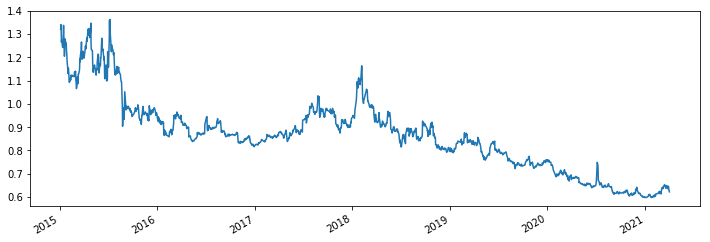

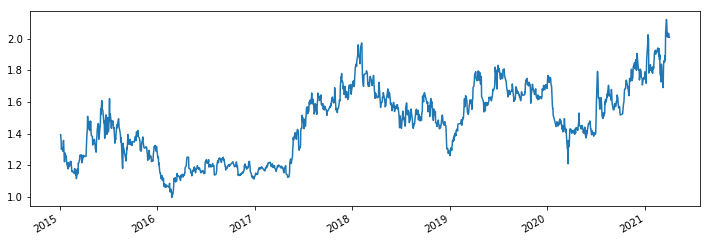

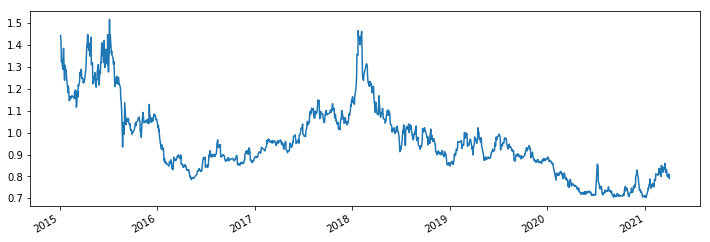

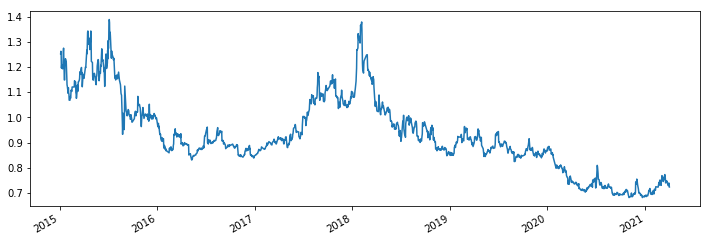

In [128]:
for code in dfobj.iloc[-4:,:].index:
    plt.figure()
    print(dfobj.loc[code,'display_name'])
    all_dfprice[code].pb_ratio.plot(figsize=(12,4),label=dfobj.loc[code,'display_name'])

In [119]:
all_dfprice[code]

KeyError: 'cum_profit'